In [2]:
import os
import numpy as np
import pandas as pd
from obspy import read, Trace, Stream
from scipy.stats import kurtosis, skew

# Define the folder containing the original MSD files
data_folder = "Dataset/Dataset Model/Modeling"

# Define the classes (folder names)
classes = ["BEBENG", "BOYONG", "GENDOL"]

# Function to filter traces by station and channel and extract features
def extract_features_from_file(file_path, class_label):
    st = read(file_path)
    features = []
    for trace in st:
        if trace.stats.station in ['MELAB', 'MEPAS'] and trace.stats.channel in ['HHN', 'HHZ', 'HHE']:
            trace_data = trace.data
            mean = np.mean(trace_data)
            std = np.std(trace_data)
            median = np.median(trace_data)
            min_val = np.min(trace_data)
            max_val = np.max(trace_data)
            rng = np.ptp(trace_data)  # Range
            iqr = np.percentile(trace_data, 75) - np.percentile(trace_data, 25)  # Interquartile Range (IQR)
            q1 = np.percentile(trace_data, 25)  # Interquartile First Quarter (Q1)
            q3 = np.percentile(trace_data, 75)  # Interquartile Third Quarter (Q3)
            kurt = kurtosis(trace_data)
            skewness = skew(trace_data)

            station = trace.stats.station
            channel = trace.stats.channel

            features.append([mean, std, median, min_val, max_val, rng, iqr, q1, q3, kurt, skewness, station, channel, class_label])
    return features

# Extract features and save to DataFrame
all_features = []

for class_name in classes:
    class_folder = os.path.join(data_folder, class_name)
    for filename in os.listdir(class_folder):
        if filename.endswith(".msd"):
            msd_path = os.path.join(class_folder, filename)
            file_features = extract_features_from_file(msd_path, class_name)
            all_features.extend(file_features)

df = pd.DataFrame(all_features, columns=['mean', 'standard_deviation', 'median', 'min_value', 'max_value', 
                                         'range', 'interquartile_range', 'q1', 'q3', 'kurtosis', 'skewness',
                                         'station', 'channel', 'class'])

# Save DataFrame to CSV file
csv_output_path = 'dataset.csv'
df.to_csv(csv_output_path, index=False)
print(f"Features extracted and saved to {csv_output_path}")

Features extracted and saved to dataset.csv


In [3]:
df = pd.read_csv("dataset.csv")
df

,mean,standard_deviation,median,min_value,max_value,range,interquartile_range,q1,q3,kurtosis,skewness,station,channel,class
0,-10087.594937,1095.953766,-10445.0,-14409,-7321,7088,1950.00,-10895.0,-8945.00,-0.844598,0.024230,MELAB,HHN,BEBENG
1,-8315.313791,1203.245256,-8298.0,-14163,-2830,11333,771.00,-8675.0,-7904.00,6.035557,-0.319061,MELAB,HHZ,BEBENG
2,-11952.875455,1373.377233,-11634.5,-18896,-7042,11854,1283.25,-12461.0,-11177.75,3.624293,-1.143653,MELAB,HHE,BEBENG
3,26.772818,3441.059767,14.0,-13731,14202,27933,2114.00,-1019.0,1095.00,3.309459,0.181159,MEPAS,HHE,BEBENG
4,-21.166556,3986.992718,-56.0,-19513,18687,38200,2413.00,-1202.0,1211.00,4.000728,-0.148950,MEPAS,HHN,BEBENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,310.812791,3725.247662,395.0,-16810,14033,30843,3997.00,-1665.0,2332.00,1.618849,-0.228880,MEPAS,HHE,GENDOL
822,-118.743504,10286.564361,5.0,-33741,47380,81121,13502.00,-6939.0,6563.00,0.447013,0.123296,MEPAS,HHE,GENDOL
823,-236.231179,16593.166954,-404.0,-77335,67937,145272,10074.00,-5011.0,5063.00,4.286426,-0.207059,MEPAS,HHE,GENDOL
824,724.815456,6119.723563,461.0,-26119,35465,61584,5905.00,-2383.0,3522.00,4.478436,0.349285,MEPAS,HHE,GENDOL


In [4]:
from collections import defaultdict
count_dict = defaultdict(int)

for key, value_list in df.items():
    if key in ['station', 'channel', 'class']:
        for item in value_list:
            count_dict[item] += 1

print("Counts:")
for key, value in count_dict.items():
    print(f"{key}: {value}")

Counts:
MELAB: 393
MEPAS: 433
HHN: 262
HHZ: 262
HHE: 302
BEBENG: 744
BOYONG: 42
GENDOL: 40


In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

# Assuming the DataFrame 'df' has been created and contains the data

# Initialize separate count dictionaries
station_counts = defaultdict(int)
channel_counts = defaultdict(int)
class_counts = defaultdict(int)

# Populate the count dictionaries
for key, value_list in df.items():
    if key == 'station':
        for item in value_list:
            station_counts[item] += 1
    elif key == 'channel':
        for item in value_list:
            channel_counts[item] += 1
    elif key == 'class':
        for item in value_list:
            class_counts[item] += 1



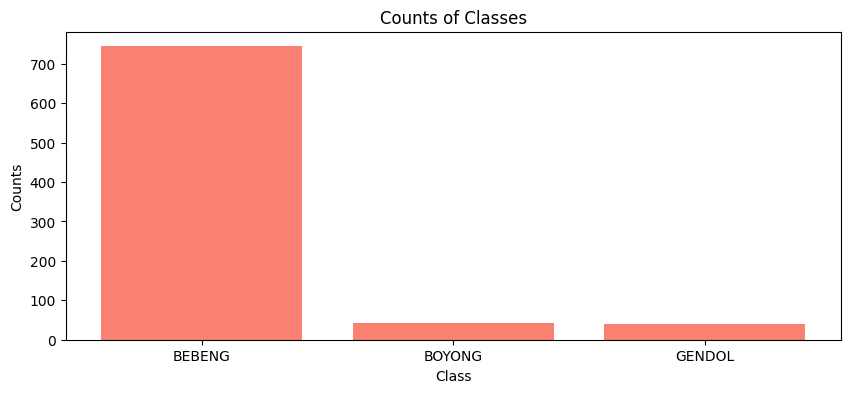

In [9]:
# Plotting Classes
plt.figure(figsize=(10, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='salmon')
plt.title('Counts of Classes')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.show()

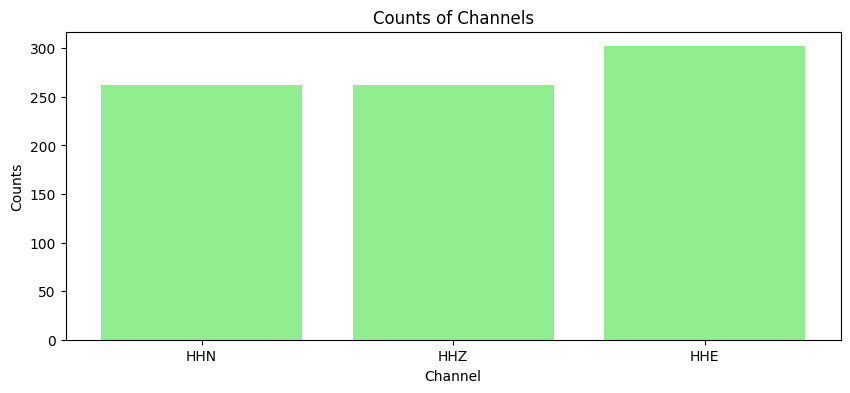

In [10]:
# Plotting Channels
plt.figure(figsize=(10, 4))
plt.bar(channel_counts.keys(), channel_counts.values(), color='lightgreen')
plt.title('Counts of Channels')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

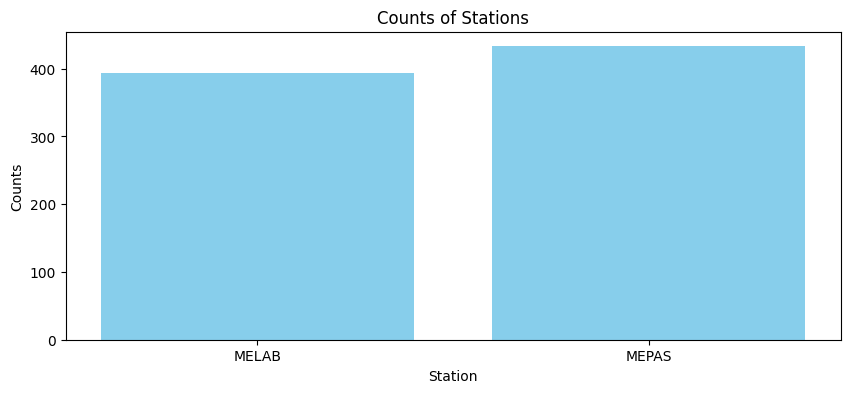

In [11]:
# Plotting Stations
plt.figure(figsize=(10, 4))
plt.bar(station_counts.keys(), station_counts.values(), color='skyblue')
plt.title('Counts of Stations')
plt.xlabel('Station')
plt.ylabel('Counts')
plt.show()

# Converting Merged Dataset

In [12]:
import pandas as pd

# Creating merged dataset
merged_data = {
    'mean_1': [], 'standard_deviation_1': [], 'median_1': [], 'min_value_1': [], 'max_value_1': [], 'range_1': [], 'interquartile_range_1': [],
    'q1_1': [], 'q3_1': [], 'kurtosis_1': [], 'skewness_1': [], 'station_1': [], 'channel_1': [], 'class_1': [],
    'mean_2': [], 'standard_deviation_2': [], 'median_2': [], 'min_value_2': [], 'max_value_2': [], 'range_2': [], 'interquartile_range_2': [],
    'q1_2': [], 'q3_2': [], 'kurtosis_2': [], 'skewness_2': [], 'station_2': [], 'channel_2': [], 'class_2': []
}

# Function to merge rows
def merge_rows(row1, row2):
    for col in df.columns:
        if col not in ['station', 'channel', 'class']:
            merged_data[f'{col}_1'].append(row1[col])
            if row2 is not None:
                merged_data[f'{col}_2'].append(row2[col])
            else:
                merged_data[f'{col}_2'].append(None)
    merged_data['station_1'].append(row1['station'])
    merged_data['channel_1'].append(row1['channel'])
    merged_data['class_1'].append(row1['class'])
    if row2 is not None:
        merged_data['station_2'].append(row2['station'])
        merged_data['channel_2'].append(row2['channel'])
        merged_data['class_2'].append(row2['class'])
    else:
        merged_data['station_2'].append(None)
        merged_data['channel_2'].append(None)
        merged_data['class_2'].append(None)

# Iterate over the dataframe and merge rows
visited = set()
for i, row1 in df.iterrows():
    if i in visited:
        continue
    found_pair = False
    for j, row2 in df.iterrows():
        if i != j and row1['channel'] == row2['channel'] and row1['class'] == row2['class'] and row1['station'] != row2['station']:
            merge_rows(row1, row2)
            visited.add(j)
            found_pair = True
            break
    if not found_pair:
        merge_rows(row1, None)

# Convert merged data to DataFrame
merged_df = pd.DataFrame(merged_data)

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Save the merged DataFrame to a CSV file
output_csv_path = 'merged_dataset.csv'
merged_df.to_csv(output_csv_path, index=False)

print(f"Merged dataset saved to {output_csv_path}")


Merged dataset saved to merged_dataset.csv


In [13]:
merged_df

,mean_1,standard_deviation_1,median_1,min_value_1,max_value_1,range_1,interquartile_range_1,q1_1,q3_1,kurtosis_1,...,max_value_2,range_2,interquartile_range_2,q1_2,q3_2,kurtosis_2,skewness_2,station_2,channel_2,class_2
0,-10087.594937,1095.953766,-10445.0,-14409,-7321,7088,1950.00,-10895.0,-8945.00,-0.844598,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
1,-8315.313791,1203.245256,-8298.0,-14163,-2830,11333,771.00,-8675.0,-7904.00,6.035557,...,7978.0,18472.0,1331.0,-702.0,629.0,4.808834,-0.082384,MEPAS,HHZ,BEBENG
2,-11952.875455,1373.377233,-11634.5,-18896,-7042,11854,1283.25,-12461.0,-11177.75,3.624293,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
3,-12356.716855,1779.579821,-12849.0,-16766,-5367,11399,2072.00,-13566.0,-11494.00,1.122037,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
4,-10712.443704,1240.537369,-10833.0,-15870,-4034,11836,1215.00,-11395.0,-10180.00,3.125415,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,310.812791,3725.247662,395.0,-16810,14033,30843,3997.00,-1665.0,2332.00,1.618849,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
816,-118.743504,10286.564361,5.0,-33741,47380,81121,13502.00,-6939.0,6563.00,0.447013,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
817,-236.231179,16593.166954,-404.0,-77335,67937,145272,10074.00,-5011.0,5063.00,4.286426,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
818,724.815456,6119.723563,461.0,-26119,35465,61584,5905.00,-2383.0,3522.00,4.478436,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
